# Stock Trading Analysis

#### Using Twitter Data to Observe Trends in Financial Markets

#### Project Methodology | Notebook Two

There are several popular investors that gain notoriety by sharing a few of their stock picks on Twitter. The goal of this project is to extract popular Tweets to identify ticker symbols for further analysis. The stock data in this project will come from Yahoo finance. The project will follow the OSEMN framework.  

#### Notebook Structure
* Notebook 1 will focus on Twitter data and introductory ticker symbol analysis. 
* **Notebook 2 will dive deeper into the most frequently tweeted ticker symbols and their performance since January 1st of 2021.** 

## Important Note
#### None of the following is meant to be financial advice. This is simply an observation of trends in the market.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# plt.style.use('seaborn-poster') 
sns.set_style('whitegrid')
pd.set_option('mode.chained_assignment', None)

In [2]:
from pandas_datareader import data, wb
import datetime
import plotly.graph_objects as go
import chart_studio

In [23]:
# import chart_studio.plotly as py
from plotly.offline import plot
import cufflinks as cf
cf.go_offline()

# Obtain | Stock Data 
Stock data will be pulled via Yahoo Finance. Notebook one observed the 15 most mentioned stock tickers by traderstewie on Twitter.

* MVIS: Microvision, Inc
* SOL: ReneSola
* SOLO: ElectraMeccanica
* KOPN: Kopin Corporation
* VERU: Veru Company
* HIMX: Himax Technologies, Inc
* SM: SM Energy Co
* SPWR: SunPower Corporation
* WISH: ContextLogic, Inc
* COTY: Coty Company
* TAN: Invesco Solar ETF
* GEVO: Gevo Biofuel company
* UAVS: Ageagle Aerial Systems, Inc
* NNDM: Nano Dimension Company
* PLTR: Palantir Technologies Software company

**Note: Yahoo finance may not be able to pull data on each of these so we may lose a few ticker symbols along the way. In either case, the analysis will narrow down the list to the top 5 performing symbols in 2021**

## Note | API Issues

The Yahoo finance API is currently down but does allow you to download single csv files individually. When you run each individual cell, the resulting error provides a URL you can use to view and download your prepared data. Downloading, importing and concatenating files to continue.

```python
# preferred, but doesn't provide a link, must call individual tickers for now
df = data.DataReader(['COTY','HIMX','KOPN','MVIS','SM','SOL','SOLO',
                      'SPWR','TAN','VERU'],'yahoo', start, end)
```

```python
# working option, link provided | top 10 stock mentions
start = datetime.datetime(2021, 1, 1)
end = datetime.datetime(2021, 7, 8)

MVIS = data.DataReader("MVIS", 'yahoo', start, end)
SOL = data.DataReader("SOL", 'yahoo', start, end)
SOLO = data.DataReader("SOLO", 'yahoo', start, end)
KOPN = data.DataReader("KOPN", 'yahoo', start, end)
VERU = data.DataReader("VERU", 'yahoo', start, end)
HIMX = data.DataReader("HIMX", 'yahoo', start, end)
SM = data.DataReader("SM", 'yahoo', start, end)
SPWR = data.DataReader("SPWR", 'yahoo', start, end)
COTY = data.DataReader("COTY", 'yahoo', start, end)
TAN = data.DataReader("TAN", 'yahoo', start, end)
```

# Scrub 
#### Importing and Combining Stock Files

In [4]:
# importing files / unfortunately one at a time
MVIS = pd.read_csv('yahoo/MVIS.csv',index_col='Date')
SOL = pd.read_csv('yahoo/SOL.csv',index_col='Date')
SOLO = pd.read_csv('yahoo/SOLO.csv',index_col='Date')
KOPN = pd.read_csv('yahoo/KOPN.csv',index_col='Date')
VERU = pd.read_csv('yahoo/VERU.csv',index_col='Date')
HIMX = pd.read_csv('yahoo/HIMX.csv',index_col='Date')
SM = pd.read_csv('yahoo/SM.csv',index_col='Date')
SPWR = pd.read_csv('yahoo/SPWR.csv',index_col='Date')
COTY = pd.read_csv('yahoo/COTY.csv',index_col='Date')
TAN = pd.read_csv('yahoo/TAN.csv',index_col='Date')

In [5]:
# tickers in alphabetical order / tickers.sort()
tickers = ['COTY', 'HIMX', 'KOPN', 'MVIS', 'SM', 'SOL', 'SOLO', 
           'SPWR', 'TAN', 'VERU']
# combining csv files
df = pd.concat([COTY,HIMX,KOPN,MVIS,SM,SOL,SOLO,SPWR,TAN,VERU],axis=1,keys=tickers)
df.columns.names = ['Stock Ticker','Stock Info']

In [6]:
df.head(3)

Stock Ticker  COTY                                        HIMX              \
Stock Info    Open  High   Low Close Adj Close    Volume  Open  High   Low   
Date                                                                         
2021-01-04    7.05  7.05  6.64  6.76      6.76   9424800  7.64  7.69  7.01   
2021-01-05    6.76  6.96  6.76  6.89      6.89   7097200  7.14  7.44  7.11   
2021-01-06    6.95  7.26  6.82  6.96      6.96  10631100  7.40  7.69  7.14   

Stock Ticker        ...         TAN                                   VERU  \
Stock Info   Close  ...         Low       Close   Adj Close   Volume  Open   
Date                ...                                                      
2021-01-04    7.14  ...  103.000000  104.959999  104.959999  2978200  8.55   
2021-01-05    7.37  ...  103.720001  106.070000  106.070000  2112800  7.92   
2021-01-06    7.32  ...  111.699997  115.269997  115.269997  7216500  9.35   

Stock Ticker                                        
Stock Info    High   Low Close Adj Close    Volume  
Date                                                
2021-01-04    8.56  7.85  8.05      8.05   2846800  
2021-01-05    9.70  7.77  9.49      9.49  11719000  
2021-01-06    9.85  9.03  9.23      9.23   5271800  

[3 rows x 60 columns]

# Exploratory Data Analysis

Multi-level indexing using .xs for stock analysis

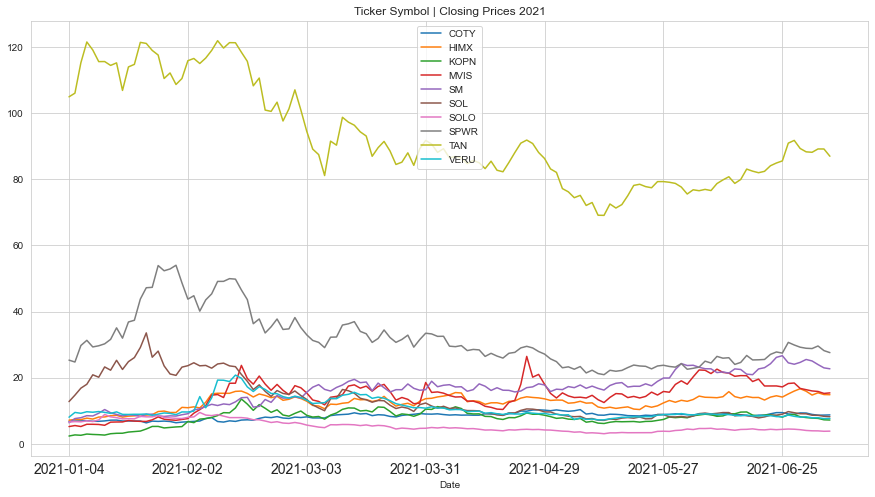

In [7]:
# df.xs(key='Close',axis=1,level='Stock Info').plot()

for tick in tickers:
    df[tick]['Close'].plot(figsize=(15,8),label=tick)
plt.legend(loc='upper center');
plt.title('Ticker Symbol | Closing Prices 2021')
plt.xticks(rotation=0,fontsize=14);
plt.savefig('closingprices2021.jpg', dpi=300)

## Max Closing Price per Stock

In [8]:
df.xs(key='Close',axis=1,level='Stock Info').max() #.plot(kind='bar')

Stock Ticker
COTY     10.340000
HIMX     16.660000
KOPN     13.560000
MVIS     26.440001
SM       26.650000
SOL      33.549999
SOLO      9.480000
SPWR     54.009998
TAN     121.940002
VERU     20.780001
dtype: float64

## Stock Returns 2021

In [9]:
rdf = pd.DataFrame()

for tick in tickers:
    rdf[tick] = df[tick]['Close'].pct_change()
# rdf.head()

In [10]:
# sns.pairplot(rdf[1:]);

It looks like there is a bit of a correlation between returns on a few stocks.

#### Best & Worst Returns

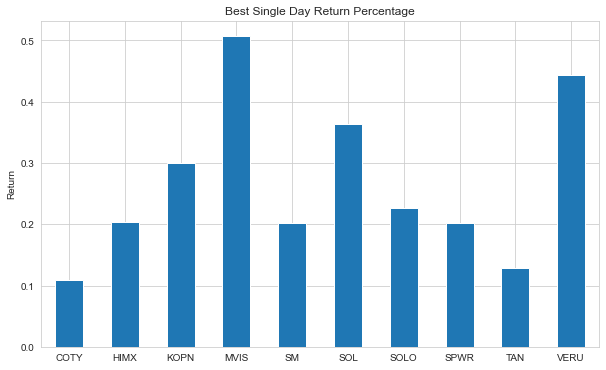

In [11]:
# best single day returns
rdf.max().plot(kind='bar',figsize=(10,6),title='Best Single Day Return Percentage',ylabel='Return');
plt.xticks(rotation=0);
plt.savefig('bestsingleday.jpg', dpi=300)
# date of best single day returns
# rdf.idxmax()

In [12]:
# worst single day returns
rdf.min()
# date of worst single day returns
# rdf.idxmin()

COTY   -0.151134
HIMX   -0.171763
KOPN   -0.157369
MVIS   -0.237519
SM     -0.210526
SOL    -0.219374
SOLO   -0.119843
SPWR   -0.166934
TAN    -0.087581
VERU   -0.236695
dtype: float64

#### The Riskiest Stock

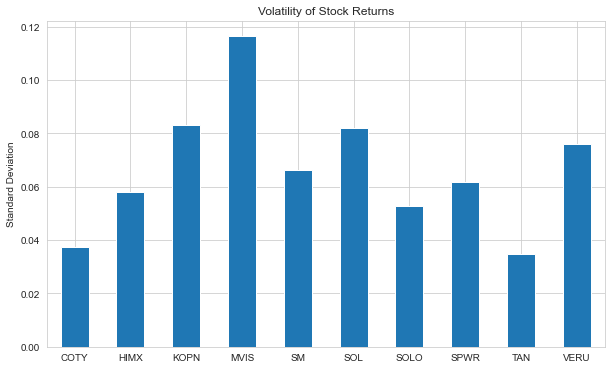

In [13]:
rdf.std().plot(kind='bar',figsize=(10,6),title='Volatility of Stock Returns',ylabel='Standard Deviation');
plt.xticks(rotation=0);
plt.savefig('volreturns.jpg', dpi=300)
# MVIS

## Top Two Long Term Performers
Assumption: You entered the market on January first and stayed in

**Keep in mind, these are volatile stocks, and the idea is to play short term for larger gains. It's interesting to see that these two stocks did continue to grow over the long term.** 

In [14]:
rdf.tail(1).T.sort_values(by='2021-07-08',ascending=False)[:2].reset_index().rename(columns={'2021-07-08':'Cumulative Return'})

Date,index,Cumulative Return
0,SOLO,0.010554
1,MVIS,0.010499


# Analyzing Growth Stocks
https://pythonrepo.com/repo/santosjorge-cufflinks-python-data-validation

## Candle Stick Charts

In [15]:
MVIS[['Open', 'High', 'Low', 'Close']].iplot(kind='candle',title='MVIS | Microvision Stock Price')

In [16]:
SOLO[['Open', 'High', 'Low', 'Close']].iplot(kind='candle',title='SOLO | ElectraMeccanica Stock Price')

## Financial Statistics | Quant Figures

In [17]:
MVIS = MVIS[['Open', 'High', 'Low', 'Close','Volume']]

In [22]:
qf=cf.QuantFig(MVIS,title='MVIS | Quant Figure',legend='center',name='GS')
qf.add_bollinger_bands(periods=20,boll_std=2,colors=['magenta','grey'],fill=True)
qf.add_sma([10],width=2,color=['green'],legendgroup=True)
qf.add_macd()
qf.add_volume()
qf.iplot()

In [19]:
SOLO = SOLO[['Open', 'High', 'Low', 'Close','Volume']]

In [20]:
qf=cf.QuantFig(SOLO,title='SOLO | Quant Figure',legend='center',name='GS')
qf.add_bollinger_bands(periods=20,boll_std=2,colors=['magenta','grey'],fill=True)
qf.add_sma([10],width=2,color=['green'],legendgroup=True)
qf.add_macd()
qf.add_volume()
qf.iplot()

# Future Work
This notebook provided an introduction into the analysis of stocks and trends that may be leveraged during investment. The notebook is merely an introduction and future work can dive deeper into statistical trends and investment analysis. 

For any additional questions, please reach out via email at santana2.miguel@gmail.com or on [LinkedIn.](https://www.linkedin.com/in/miguel-angel-santana-ii-mba-51467276/)